In [30]:
# design a halfband lowpass filter for 2x downsampling
import numpy as np
from scipy.signal import remez

Fs = 96000
fp, fsb = 20000, 28000
bands = [0, fp, fsb, Fs/2]                          # Hz
taps = 63                                       # odd length (pick ~75–85)
h = remez(taps, [0, fp, fsb, Fs/2], [1, 0], fs=Fs)  # half-band lowpass
# exploit half-band zeros: every other coeff (except center) is ~0
nz = np.where(np.abs(h) > 1e-12)[0]

31 0.5000461444956996


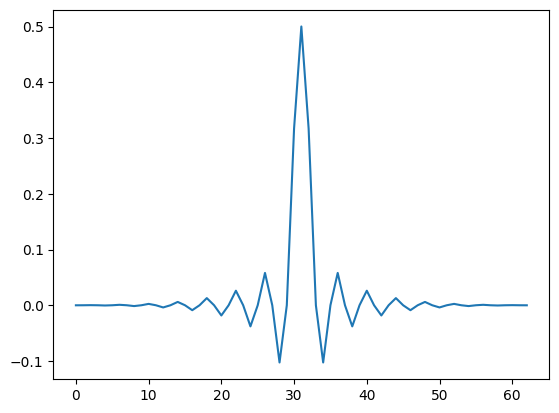

#define K 16
const float fir_center_tap = 0.5000461f;
const static float fir_kernel[K] = {
0.3171385f,-0.1026337f,0.0580279f,-0.0378839f,0.0260971f,-0.0182989f,0.0128162f,-0.0088559f,0.0059815f,-0.0039141f,0.0024594f,-0.0014665f,0.0008178f,-0.0004156f,0.0001849f,-0.0000690f,};


In [31]:
from matplotlib import pyplot as plt
print(np.argmax(h),np.max(h))
plt.plot(h)
plt.show()
K=(len(h)+1)//4
print(f"#define K {K}")
print(f"const float fir_center_tap = {h[K*2-1]:0.7f}f;")
print("const static float fir_kernel[K] = {")
for i in range(K*2,K*4,2):
    print(f"{h[i]:0.7f}f,", end="")
print("};")
